In [ ]:
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')

def get_sentiment(text):
    """Determine sentiment polarity (-1 to 1)"""
    return TextBlob(text).sentiment.polarity

def classify_sentiment(score):
    """Convert polarity score to sentiment label"""
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Load dataset
df = pd.read_csv("/content/Reviews 500.csv")

# Ensure relevant text column exists
if 'Text' not in df.columns:
    raise ValueError("Column 'Text' not found in dataset")

# Compute sentiment scores
df['Sentiment Score'] = df['Text'].apply(get_sentiment)
df['Sentiment Label'] = df['Sentiment Score'].apply(classify_sentiment)

# Display analysis results
print(df[['Text', 'Sentiment Score', 'Sentiment Label']].head())

# Save results
df.to_csv("/content/Reviews_500_Sentiment.csv", index=False)
print("Sentiment analysis completed. Results saved.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                Text  Sentiment Score  \
0  I have bought several of the Vitality canned d...         0.450000   
1  Product arrived labeled as Jumbo Salted Peanut...        -0.033333   
2  This is a confection that has been around a fe...         0.133571   
3  If you are looking for the secret ingredient i...         0.166667   
4  Great taffy at a great price.  There was a wid...         0.483333   

  Sentiment Label  
0        Positive  
1        Negative  
2        Positive  
3        Positive  
4        Positive  
Sentiment analysis completed. Results saved.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf06balql/sb9kkmtq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf06balql/jxlciy1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33149', 'data', 'file=/tmp/tmpf06balql/sb9kkmtq.json', 'init=/tmp/tmpf06balql/jxlciy1q.json', 'output', 'file=/tmp/tmpf06balql/prophet_modely0psp9p1/prophet_model-20250205074200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


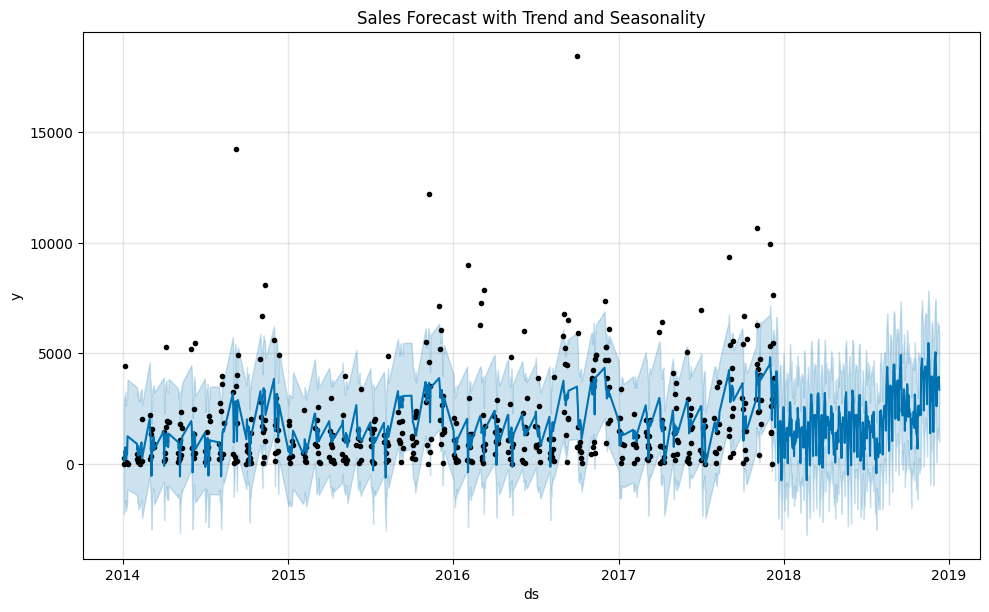

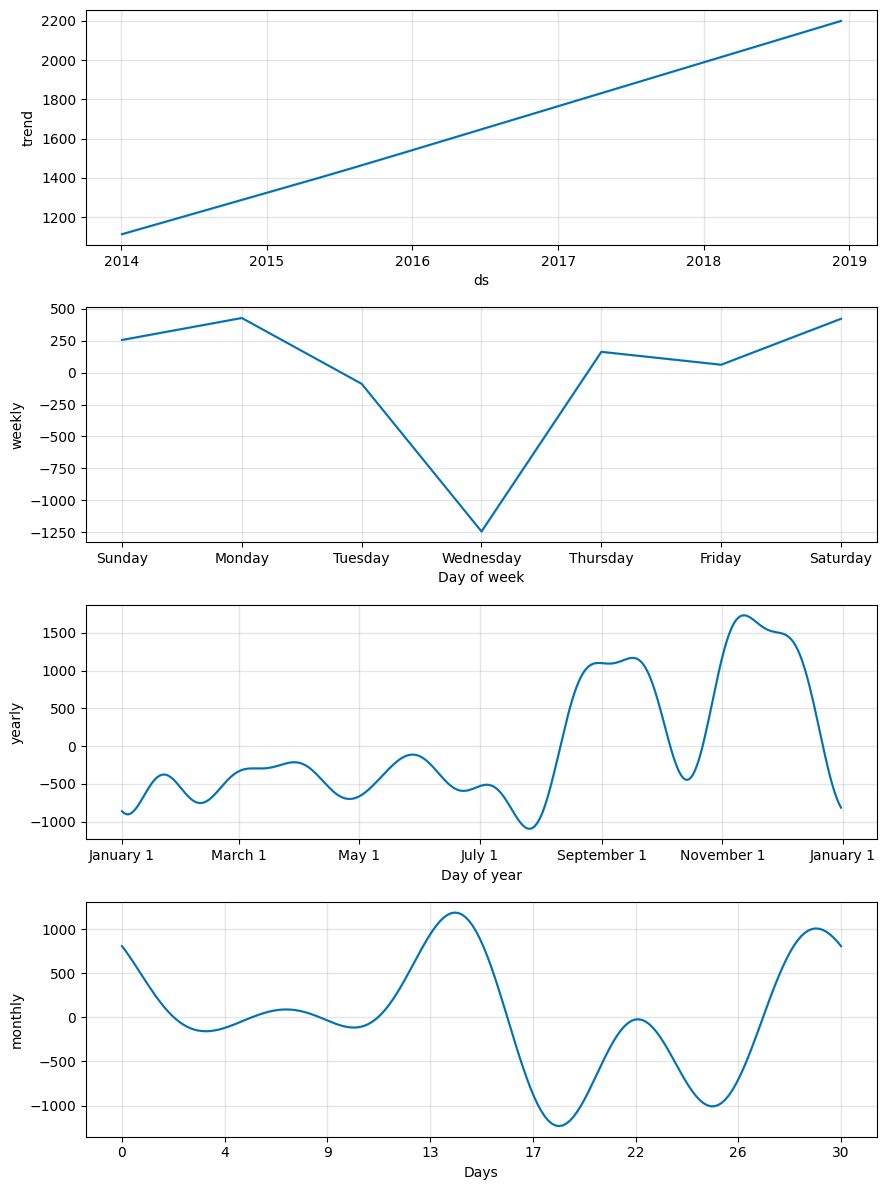

Weekly Forecast:
            ds          yhat    yhat_lower    yhat_upper
254 2018-11-18  30568.098673  13341.314118  47409.016146
255 2018-11-25  22816.929160   6202.905783  39275.945097
256 2018-12-02  24434.834092   7632.399943  41123.105273
257 2018-12-09  26647.226496   9815.746893  43470.264814
258 2018-12-16   7303.101445   2535.464488  12010.359719
Monthly Forecast:
           ds           yhat    yhat_lower     yhat_upper
55 2018-08-31   75150.509667    612.193795  150498.063469
56 2018-09-30   96265.605782  24008.316829  168522.786379
57 2018-10-31   68131.189232  -7315.643884  142073.628929
58 2018-11-30  112810.398300  39976.869561  184184.317535
59 2018-12-31   43524.370260  17403.479602   69850.752655
Yearly Forecast:
          ds           yhat     yhat_lower    yhat_upper
0 2014-12-31  166303.329244 -125402.628347  4.600086e+05
1 2015-12-31  197037.673617  -70618.907805  4.647407e+05
2 2016-12-31  242886.034284  -60111.680038  5.467085e+05
3 2017-12-31  319308.755323  -

<ipython-input-9-8036cf7a0dbc>:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_forecast = forecast.set_index('ds').resample('M').sum().reset_index()
<ipython-input-9-8036cf7a0dbc>:58: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_forecast = forecast.set_index('ds').resample('Y').sum().reset_index()


In [ ]:
import pandas as pd
import os
from prophet import Prophet
import matplotlib.pyplot as plt

# Suppress pandas Arrow string type warnings
pd.options.mode.string_storage = 'python'

# Sample data (assuming it's saved as 'sample_data.csv')
# Load the dataset with proper encoding to handle UnicodeDecodeError
try:
    df = pd.read_csv('/content/Superstore - store analysis.csv', encoding='utf-8')  # Replace with your actual file path
except UnicodeDecodeError:
    df = pd.read_csv('/content/Superstore - store analysis.csv', encoding='ISO-8859-1')

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Aggregate sales by date
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Rename columns for Prophet
daily_sales = daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize Prophet model with trend, seasonality, and holidays
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model.fit(daily_sales)

# Create future dataframe for next 365 days
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast with Trend and Seasonality')
plt.show()

# Plot components (trend, yearly, weekly, monthly seasonality)
fig2 = model.plot_components(forecast)
plt.show()

# Weekly forecast
weekly_forecast = forecast.set_index('ds').resample('W').sum().reset_index()
print("Weekly Forecast:")
print(weekly_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Monthly forecast
monthly_forecast = forecast.set_index('ds').resample('M').sum().reset_index()
print("Monthly Forecast:")
print(monthly_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Yearly forecast
yearly_forecast = forecast.set_index('ds').resample('Y').sum().reset_index()
print("Yearly Forecast:")
print(yearly_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

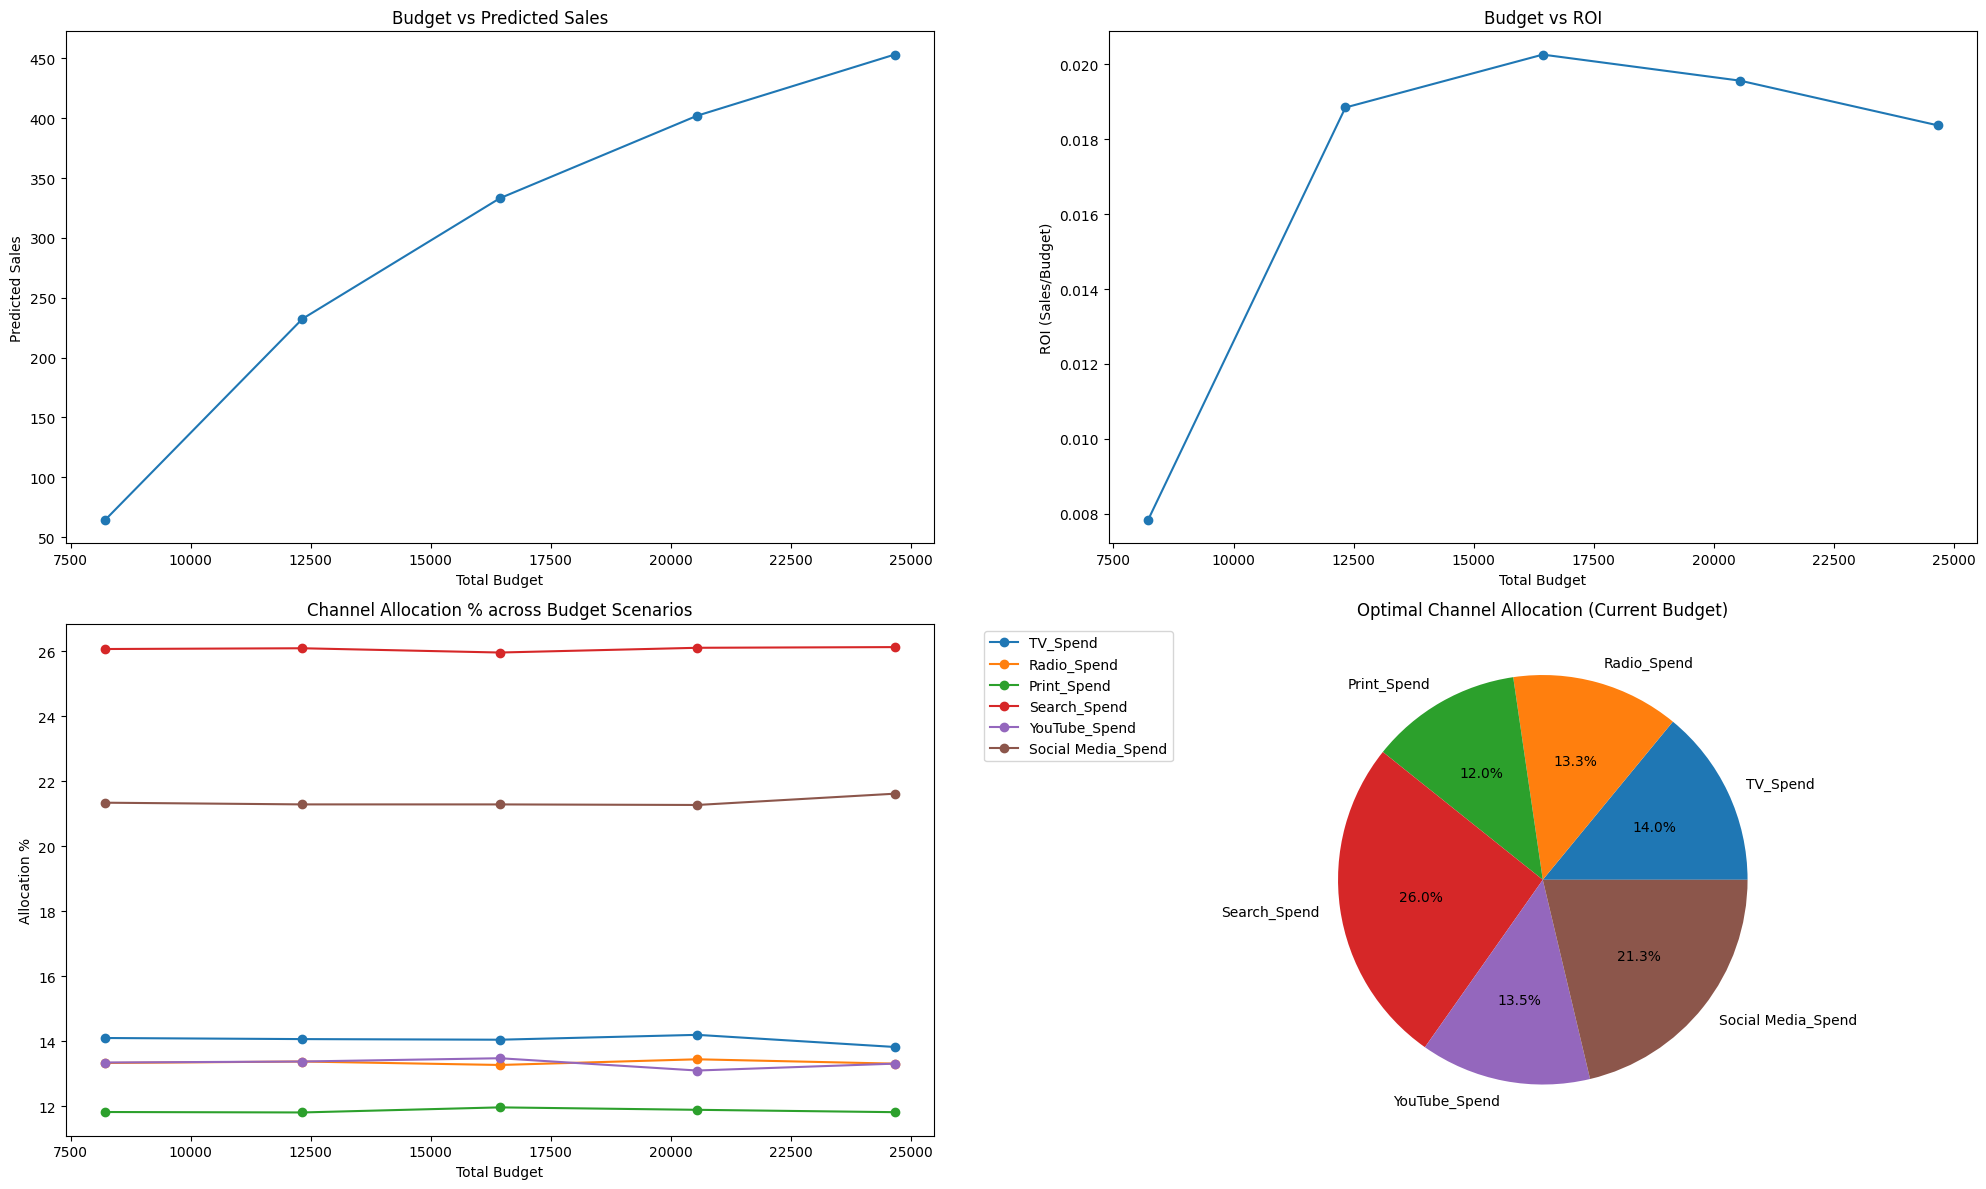


Optimization Results for Different Budget Scenarios:

Scenario 1 - Total Budget: $8,220.59
Predicted Sales: $64.39
ROI: 0.01

Channel Allocation:
TV_Spend: $1,158.80 (14.1%)
Radio_Spend: $1,095.52 (13.3%)
Print_Spend: $971.44 (11.8%)
Search_Spend: $2,143.57 (26.1%)
YouTube_Spend: $1,096.77 (13.3%)
Social Media_Spend: $1,754.50 (21.3%)
--------------------------------------------------

Scenario 2 - Total Budget: $12,330.89
Predicted Sales: $232.44
ROI: 0.02

Channel Allocation:
TV_Spend: $1,734.05 (14.1%)
Radio_Spend: $1,648.94 (13.4%)
Print_Spend: $1,455.48 (11.8%)
Search_Spend: $3,218.21 (26.1%)
YouTube_Spend: $1,648.92 (13.4%)
Social Media_Spend: $2,625.29 (21.3%)
--------------------------------------------------

Scenario 3 - Total Budget: $16,441.19
Predicted Sales: $333.16
ROI: 0.02

Channel Allocation:
TV_Spend: $2,308.96 (14.0%)
Radio_Spend: $2,181.06 (13.3%)
Print_Spend: $1,966.36 (12.0%)
Search_Spend: $4,269.37 (26.0%)
YouTube_Spend: $2,215.14 (13.5%)
Social Media_Spend: $3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('/content/MMM brand data.csv')

# Define adstock transformation function
def adstock_transform(x, decay_rate):
    result = [x[0]]
    for i in range(1, len(x)):
        result.append(x[i] + decay_rate * result[i-1])
    return np.array(result)

# Define saturation transformation function (Hill function)
def saturation_transform(x, k, s):
    return x**s / (k**s + x**s)

# Initialize parameters
channels = ['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']
decay_rates = {channel: 0.3 for channel in channels}
k_values = {channel: 0.5 for channel in channels}
s_values = {channel: 0.5 for channel in channels}

# Apply transformations
df_transformed = df.copy()
for channel in channels:
    df_transformed[f'{channel}_adstock'] = adstock_transform(df[channel].values, decay_rates[channel])
    df_transformed[f'{channel}_final'] = saturation_transform(
        df_transformed[f'{channel}_adstock'],
        k_values[channel],
        s_values[channel]
    )

# Prepare data for modeling
X = df_transformed[[f'{channel}_final' for channel in channels]]
y = df['Sales']
X['Promotion'] = df['Promotion']

# Fit linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Function to predict sales given spend
def predict_sales(spend_dict, promotion=0):
    transformed_spends = {}
    for channel in channels:
        adstock = adstock_transform(np.array([spend_dict[channel]]), decay_rates[channel])[0]
        transformed_spends[channel] = saturation_transform(adstock, k_values[channel], s_values[channel])

    X_pred = np.array([transformed_spends[channel] for channel in channels] + [promotion])
    return model.predict(X_pred.reshape(1, -1))[0]

# Optimization function for a given budget
def optimize_budget(total_budget):
    def objective_function(spend_vector):
        spend_dict = {channel: spend for channel, spend in zip(channels, spend_vector)}
        return -predict_sales(spend_dict)  # Negative because we're minimizing

    constraints = [
        {'type': 'eq', 'fun': lambda x: sum(x) - total_budget}  # Budget constraint
    ]
    bounds = [(0, total_budget) for _ in channels]  # Can't spend negative or more than budget

    initial_guess = np.array([total_budget/len(channels) for _ in channels])
    result = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x, -result.fun  # Return optimal allocation and predicted sales

# Current total budget
current_budget = df[channels].sum().sum() / len(df)

# Generate different budget scenarios
budget_scenarios = np.linspace(current_budget * 0.5, current_budget * 1.5, 5)
optimization_results = []

for budget in budget_scenarios:
    allocation, predicted_sales = optimize_budget(budget)
    optimization_results.append({
        'Budget': budget,
        'Predicted_Sales': predicted_sales,
        'ROI': predicted_sales / budget,
        'Allocation': dict(zip(channels, allocation))
    })

# Convert results to DataFrame
results_df = pd.DataFrame(optimization_results)

# Visualizations
plt.figure(figsize=(20, 12))

# 1. Budget vs Sales
plt.subplot(2, 2, 1)
plt.plot(results_df['Budget'], results_df['Predicted_Sales'], marker='o')
plt.title('Budget vs Predicted Sales')
plt.xlabel('Total Budget')
plt.ylabel('Predicted Sales')

# 2. Budget vs ROI
plt.subplot(2, 2, 2)
plt.plot(results_df['Budget'], results_df['ROI'], marker='o')
plt.title('Budget vs ROI')
plt.xlabel('Total Budget')
plt.ylabel('ROI (Sales/Budget)')

# 3. Channel Allocation across Budgets
plt.subplot(2, 2, 3)
channel_allocations = pd.DataFrame([res['Allocation'] for res in optimization_results])
channel_allocations_pct = channel_allocations.div(channel_allocations.sum(axis=1), axis=0) * 100

for channel in channels:
    plt.plot(budget_scenarios, channel_allocations_pct[channel], marker='o', label=channel)
plt.title('Channel Allocation % across Budget Scenarios')
plt.xlabel('Total Budget')
plt.ylabel('Allocation %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Optimal Allocation for Current Budget
plt.subplot(2, 2, 4)
current_allocation = channel_allocations.iloc[2]  # Middle scenario (current budget)
plt.pie(current_allocation, labels=channels, autopct='%1.1f%%')
plt.title('Optimal Channel Allocation (Current Budget)')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nOptimization Results for Different Budget Scenarios:")
for i, result in enumerate(optimization_results):
    print(f"\nScenario {i+1} - Total Budget: ${result['Budget']:,.2f}")
    print(f"Predicted Sales: ${result['Predicted_Sales']:,.2f}")
    print(f"ROI: {result['ROI']:.2f}")
    print("\nChannel Allocation:")
    for channel, amount in result['Allocation'].items():
        print(f"{channel}: ${amount:,.2f} ({amount/result['Budget']*100:.1f}%)")
    print("-" * 50)

# Calculate and print marginal returns
print("\nMarginal Returns Analysis:")
for i in range(1, len(optimization_results)):
    budget_increase = results_df['Budget'].iloc[i] - results_df['Budget'].iloc[i-1]
    sales_increase = results_df['Predicted_Sales'].iloc[i] - results_df['Predicted_Sales'].iloc[i-1]
    marginal_roi = sales_increase / budget_increase
    print(f"\nBudget Increase: ${budget_increase:,.2f}")
    print(f"Sales Increase: ${sales_increase:,.2f}")
    print(f"Marginal ROI: {marginal_roi:.2f}")

In [ ]:
import pandas as pd
from textblob import TextBlob
import nltk
import torch
from transformers import pipeline

nltk.download('punkt')

# Function to get sentiment polarity (-1 to 1)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Convert polarity score to sentiment label
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Truncate text to avoid model token limits
def truncate_text(text, max_tokens=512):
    tokens = text.split()
    return ' '.join(tokens[:max_tokens])

# Detect the best available device
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

# Load dataset
df = pd.read_csv("/content/Reviews 500.csv")

# Check if 'Text' column exists
if 'Text' not in df.columns:
    raise ValueError("Column 'Text' not found in dataset")

# Compute sentiment scores and labels
df['Sentiment Score'] = df['Text'].apply(get_sentiment)
df['Sentiment Label'] = df['Sentiment Score'].apply(classify_sentiment)

# Load emotion classification model
emotion_classifier = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion", top_k=5, device=0 if device == "cuda" else -1)

df['Truncated Text'] = df['Text'].apply(lambda x: truncate_text(str(x)))

# Emotion analysis function
def extract_top_emotions(text):
    try:
        if not isinstance(text, str) or text.strip() == "":
            return None
        emotions = emotion_classifier(text)
        top_emotions = {e['label']: round(e['score'], 4) for e in emotions[0]}
        return top_emotions
    except RuntimeError:
        return "Error: Input too long"

df['Emotion Analysis'] = df['Truncated Text'].apply(extract_top_emotions)

# Display sample results
print(df[['Text', 'Sentiment Score', 'Sentiment Label', 'Emotion Analysis']].head())

# Save results
df.to_csv("/content/Reviews_500_Sentiment_Emotion.csv", index=False)
print("Sentiment and emotion analysis completed. Results saved.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (582 > 512). Running this sequence through the model will result in indexing errors


                                                Text  Sentiment Score  \
0  I have bought several of the Vitality canned d...         0.450000   
1  Product arrived labeled as Jumbo Salted Peanut...        -0.033333   
2  This is a confection that has been around a fe...         0.133571   
3  If you are looking for the secret ingredient i...         0.166667   
4  Great taffy at a great price.  There was a wid...         0.483333   

  Sentiment Label                                   Emotion Analysis  
0        Positive  {'joy': 0.9977, 'love': 0.0015, 'sadness': 0.0...  
1        Negative  {'joy': 0.5777, 'fear': 0.3174, 'anger': 0.075...  
2        Positive  {'joy': 0.7871, 'love': 0.1622, 'anger': 0.022...  
3        Positive  {'joy': 0.9957, 'love': 0.0017, 'anger': 0.001...  
4        Positive  {'joy': 0.9307, 'love': 0.0521, 'anger': 0.012...  
Sentiment and emotion analysis completed. Results saved.
